In [1]:
import numpy as np

In [2]:
from keras.datasets import mnist
from keras.layers import Dense, Input
from keras.models import Model
import matplotlib.pyplot as plt
import livelossplot

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape([-1, X_train.shape[-2]*X_train.shape[-1]])
X_test = X_test.reshape([-1, X_test.shape[-2]*X_test.shape[-1]])
X_test = X_test/255
X_train = X_train/255

In [5]:
# Encoder
input_layer = Input(shape=(28*28,))
# encoder_layer1 = Dense(28*28, activation='relu')(input_layer)
encoder_layer2 = Dense(100, activation='relu')(input_layer)

#Decoder
decoder_layer1 = Dense(28*28, activation='sigmoid')(encoder_layer2)
autoencoder = Model(input_layer, decoder_layer1)

In [6]:
encoder = Model(input_layer, encoder_layer2)
decoder_input_layer = Input(shape=(100,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(decoder_input_layer, decoder_layer(decoder_input_layer))

In [7]:
autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          79,184 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 157,684 (615.95 KB)

 Trainable params: 157,684 (615.95 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
encoder.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,500 (306.64 KB)

 Trainable params: 78,500 (306.64 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
decoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 784)                 │          79,184 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,184 (309.31 KB)

 Trainable params: 79,184 (309.31 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
autoencoder.compile(optimizer='adam',
                   loss='BinaryCrossentropy')
plotlosses = livelossplot.PlotLossesKeras()

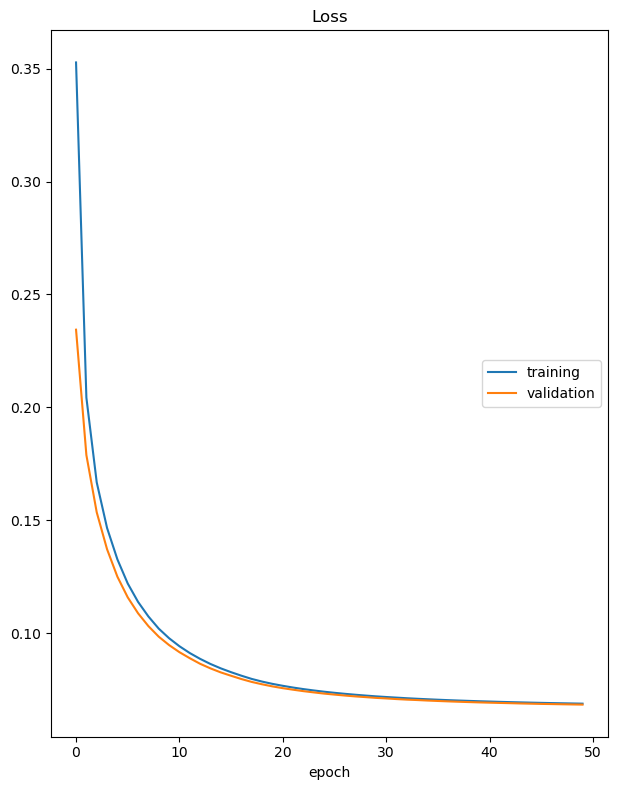

Loss
	training         	 (min:    0.069, max:    0.353, cur:    0.069)
	validation       	 (min:    0.068, max:    0.234, cur:    0.068)


In [11]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=1000,
                callbacks=[plotlosses],
               validation_data=(X_test, X_test),
               verbose=0)

In [12]:
encoded_img = encoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [13]:
encoded_img.shape

(10000, 100)

In [14]:
decoded_img = decoder.predict(encoded_img)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [15]:
decoded_img.shape

(10000, 784)

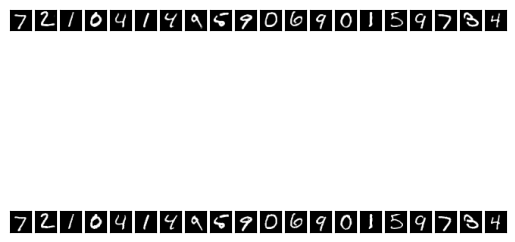

In [16]:
n=20
for i in range(0, n):
#     fig, axs = plt.subplots(2, n, figsize=(5, 5))
#     plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.2, hspace=0.4)
    ax = plt.subplot(2, n, i+1)
    img = decoded_img[i].reshape(28,28)
    # And displaying the image
    plt.imshow(img, cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(2, n, i+n+1)
    img = X_test[i].reshape(28,28)
    # And displaying the image
    plt.imshow(img, cmap="gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
#     plt.title("act/:"+ str(classes_actual[j])+" pred:"+str(classes_predicted[j]))
plt.show()